In [1]:
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
data_file = "../../dataset/filterd1.csv"

In [2]:
df = pd.read_csv("../../dataset/filterd1.csv")

In [3]:
df.shape

(64862, 10)

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,15,5,1282867200,"My cats LOVE this ""diet"" food better than thei...",One of my boys needed to lose some weight and ...
1,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,15,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...
2,16,B001GVISJM,A1CZX3CP8IKQIJ,Brian A. Lee,4,15,5,1262044800,"Lots of twizzlers, just what you expect.",My daughter loves twizzlers and this shipment ...
3,33,B001EO5QW8,AOVROBZ8BNTP7,S. Potter,19,15,4,1163376000,Best of the Instant Oatmeals,McCann's Instant Oatmeal is great if you must ...
4,34,B001EO5QW8,A3PMM0NFVEJGK9,"Megan ""Bad at Nicknames""",13,15,4,1166313600,Good Instant,This is a good instant oatmeal from the best o...


In [8]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [5]:
data_batches = tf.data.experimental.make_csv_dataset(
    data_file, batch_size=16,
    label_name="Score",
    select_columns=["Score","Summary"])

In [6]:
for feature_batch, label_batch in data_batches.take(3):
  print("'Score': {}".format(label_batch))
  print("features:")
  for key, value in feature_batch.items():
    print("  {!r:20s}: {}".format(key, value))

'Score': [5 5 1 1 1 1 1 1 4 5 2 5 5 5 5 3]
features:
  'Summary'           : [b'Illy is great for drip or espresso coffee machines'
 b'Great coconut water in just the right size!' b'Terrible quality candy'
 b'cheap bulk pack- major disappointment' b'Terrible Price'
 b'Great size for training but absolutely unbearable smell'
 b'No Chocolate' b'We poured ours out'
 b'For a reasonably healthy snack, these were fine.' b"Still Love 'Em"
 b'Ate some of it, threw most of it away' b'Good Price'
 b'Bar Harbor News England clam chowder' b'Great deal!'
 b'A winner in Blind Tasting' b'no extra charge for the crumbs?']
'Score': [5 5 5 5 1 5 3 4 5 1 5 3 4 4 1 4]
features:
  'Summary'           : [b'Yum!  Rich, strong, and not bitter.' b'Molasses Muffins in a Can?'
 b'Delicioso !!' b'The taste... well it may take some creativity'
 b'Do not buy from Amazon' b'Best value in grain free dog food!'
 b'so-so flavor, too much fiber for me'
 b'Swashbuckling Adventures in the Lesser Antilles!'
 b'Glad I order

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
import csv
from tensorflow.keras.preprocessing.sequence import pad_sequences

stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]


In [15]:
sentences = []
labels = []

with open(data_file, 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[6])
        sentence = row[8]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
            sentence = sentence.replace("  ", " ")
        sentences.append(sentence)

In [16]:
print(len(sentences))
print(sentences[0])

64862
My cats LOVE "diet" food better regular food


In [17]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(len(word_index))

13120


In [18]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)

[ 20  62  10 202  11  29 306  11   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0]
(64862, 37)


In [24]:
vocab_size = 1000
embedding_dim = 16
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [25]:
train_size = int(len(sentences) * training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

51889
51889
51889
12973
12973


In [26]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

8
50
3
50
2
50


In [27]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)

12973
(12973, 50)


In [28]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[1]
[1]
[1]
(51889, 1)
[1]
[1]
[1]
(12973, 1)


In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            16000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [31]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Train on 51889 samples, validate on 12973 samples
Epoch 1/30
51889/51889 - 3s - loss: 1.1843 - accuracy: 0.6070 - val_loss: 1.0119 - val_accuracy: 0.6481
Epoch 2/30
51889/51889 - 2s - loss: 0.9535 - accuracy: 0.6715 - val_loss: 0.9190 - val_accuracy: 0.6855
Epoch 3/30
51889/51889 - 2s - loss: 0.9082 - accuracy: 0.6886 - val_loss: 0.8959 - val_accuracy: 0.6940
Epoch 4/30
51889/51889 - 2s - loss: 0.8843 - accuracy: 0.6927 - val_loss: 0.8764 - val_accuracy: 0.6954
Epoch 5/30
51889/51889 - 2s - loss: 0.8611 - accuracy: 0.6964 - val_loss: 0.8590 - val_accuracy: 0.6996
Epoch 6/30
51889/51889 - 2s - loss: 0.8490 - accuracy: 0.7007 - val_loss: 0.8571 - val_accuracy: 0.7028
Epoch 7/30
51889/51889 - 3s - loss: 0.8404 - accuracy: 0.7039 - val_loss: 0.8474 - val_accuracy: 0.7041
Epoch 8/30
51889/51889 - 2s - loss: 0.8347 - accuracy: 0.7070 - val_loss: 0.8456 - val_accuracy: 0.7055
Epoch 9/30
51889/51889 - 3s - loss: 0.8300 - accuracy: 0.7078 - val_loss: 0.8487 - val_accuracy: 0.7030
Epoch 10/30
51

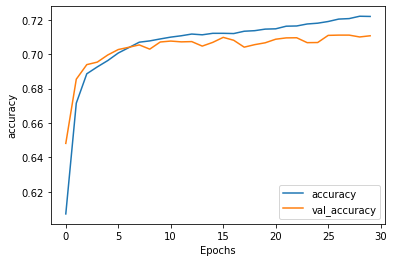

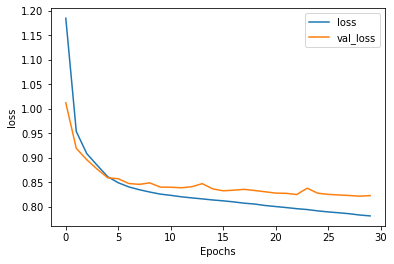

In [36]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")